In [1]:
!pip install yfinance pandas

In [6]:
import sqlite3
import pandas as pd
import yfinance as yf
from datetime import datetime

# Step 1: Define stock ticker for JSW Energy (NSE)
ticker = 'JSWENERGY.NS'

# Step 2: Define date range (last 5 years)
start_date = '2020-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Step 3: Download historical stock data from Yahoo Finance
jsw_data = yf.download(ticker, start=start_date, end=end_date)

# Step 4: Reset index to make 'Date' a column
jsw_data.reset_index(inplace=True)

# Step 5: Connect to SQLite database (it will be created in your folder)
conn = sqlite3.connect('jswe_stock_data.db')
cursor = conn.cursor()

# Step 6: Create a table to store the stock data
cursor.execute('''
CREATE TABLE IF NOT EXISTS stock_prices (
    Date TEXT,
    Open REAL,
    High REAL,
    Low REAL,
    Close REAL,
    Adj_Close REAL,
    Volume INTEGER
)
''')

# Step 7: Insert data into the table (replace if already exists)
jsw_data.to_sql('stock_prices', conn, if_exists='replace', index=False)

# Step 8: Preview the first 5 rows from the table
preview_df = pd.read_sql_query("SELECT * FROM stock_prices LIMIT 5", conn)

# Step 9: Close connection
conn.close()

# Show data
preview_df


C:\Users\Aditya Sakpal\AppData\Local\Temp\ipykernel_36628\955859817.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  jsw_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


,"('Date', '')","('Close', 'JSWENERGY.NS')","('High', 'JSWENERGY.NS')","('Low', 'JSWENERGY.NS')","('Open', 'JSWENERGY.NS')","('Volume', 'JSWENERGY.NS')"
0,2020-01-01 00:00:00,65.502441,66.498492,65.122991,65.976753,281629
1,2020-01-02 00:00:00,65.929321,67.731707,65.502444,65.597305,1604845
2,2020-01-03 00:00:00,66.593330,67.779109,66.071592,66.308748,1021494
3,2020-01-06 00:00:00,63.605183,66.545913,63.130871,66.545913,719957
4,2020-01-07 00:00:00,66.498482,66.877932,63.842341,64.032063,819939


In [8]:
import pandas as pd

# Load the Excel file
excel_path = "D:/Resume/Projects/JSW Energy/JSW Energy.xlsx"

# Check sheet names
xls = pd.ExcelFile(excel_path)
print("Sheet Names:", xls.sheet_names)


Sheet Names: ['Income Statement', 'Quarters', 'Balance Sheet', 'Cash Flow', 'Customization', 'Data Sheet']


In [9]:
# Read sheets (update sheet names if needed)
income_df = pd.read_excel(excel_path, sheet_name='Income Statement')
balance_df = pd.read_excel(excel_path, sheet_name='Balance Sheet')
cashflow_df = pd.read_excel(excel_path, sheet_name='Cash Flow')

# Preview
display(income_df.head())
display(balance_df.head())
display(cashflow_df.head())

,JSW ENERGY LTD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,SCREENER.IN,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Narration,2016-03-31 00:00:00,2017-03-31 00:00:00,2018-03-31 00:00:00,2019-03-31 00:00:00,2020-03-31 00:00:00,2021-03-31 00:00:00,2022-03-31 00:00:00,2023-03-31 00:00:00,2024-03-31 00:00:00,2025-03-31 00:00:00,Trailing,Best Case,Worst Case
2,Sales,9824.49,8263.43,8048.96,9137.59,8272.71,6922.2,8167.15,10331.81,11485.91,11745.39,14009.3,14009.3,12026.145891
3,Expenses,5795.72,4938.95,5335.56,6282.6,5315.85,4009.34,4595.52,7049.82,6104.13,6524.01,7417.56,7417.56,7298.085999
4,Operating Profit,4028.77,3324.48,2713.4,2854.99,2956.86,2912.86,3571.63,3281.99,5381.78,5221.38,6591.74,6591.74,4728.059892


,JSW ENERGY LTD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,SCREENER.IN,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Narration,2016-03-31 00:00:00,2017-03-31 00:00:00,2018-03-31 00:00:00,2019-03-31 00:00:00,2020-03-31 00:00:00,2021-03-31 00:00:00,2022-03-31 00:00:00,2023-03-31 00:00:00,2024-03-31 00:00:00,2025-03-31 00:00:00
2,Equity Share Capital,1626.79,1627.95,1640.05,1640.87,1641.9,1642.33,1639.67,1640.54,1641.22,1745.25
3,Reserves,8077.34,8740.51,9469.65,10181.37,10003.72,12864.67,15775.23,16988.27,19190.52,25616.18
4,Borrowings,14862.24,14349.27,11883.26,10554.88,9840.48,8371.24,8942.57,25051.07,31572.97,50185.18


,JSW ENERGY LTD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,SCREENER.IN,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Narration,2016-03-31 00:00:00,2017-03-31 00:00:00,2018-03-31 00:00:00,2019-03-31 00:00:00,2020-03-31 00:00:00,2021-03-31 00:00:00,2022-03-31 00:00:00,2023-03-31 00:00:00,2024-03-31 00:00:00,2025-03-31 00:00:00
2,Cash from Operating Activity,3537.62,3852.64,3933.81,2491.34,2082.04,3699.86,2952.03,2084.27,6233.63,3838.48
3,Cash from Investing Activity,-3271.9,-762.05,-214.73,-54.83,300.91,-1029.8,-1386.67,-6778.13,-8197.13,-22989.73
4,Cash from Financing Activity,-1622.42,-2594.92,-3967.59,-2523.18,-1961.62,-2514.75,-781.31,7327.48,1674.83,20223.38


In [10]:
import sqlite3

# Connect to your database
conn = sqlite3.connect('jswe_stock_data.db')

# Save to SQL tables
income_df.to_sql('income_statement', conn, if_exists='replace', index=False)
balance_df.to_sql('balance_sheet', conn, if_exists='replace', index=False)
cashflow_df.to_sql('cash_flow', conn, if_exists='replace', index=False)

conn.close()
print("✅ Financials inserted into SQLite!")


✅ Financials inserted into SQLite!


In [13]:
import sqlite3

# Replace this with your real path
db_path = r"D:/Resume/Projects/JSW Energy/jswe_stock_data.db"

# Connect to your database
conn = sqlite3.connect(db_path)

In [14]:
import pandas as pd

# Load all sheets into a dictionary of DataFrames
excel_path = "D:/Resume/Projects/JSW Energy/JSW Energy.xlsx"  # or the full path if needed
sheets = pd.read_excel(excel_path, sheet_name=None)

# Check what sheets are available
print("Sheet Names:", list(sheets.keys()))

Sheet Names: ['Income Statement', 'Quarters', 'Balance Sheet', 'Cash Flow', 'Customization', 'Data Sheet']


In [15]:
# Loop through all sheets and write them to DB
for sheet_name, df in sheets.items():
    # Clean the sheet name for DB table (no spaces or special characters)
    table_name = sheet_name.strip().lower().replace(" ", "_")

    # Save to SQLite (you can use 'replace' or 'append')
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    print(f"Inserted {sheet_name} into table '{table_name}'")

Inserted Income Statement into table 'income_statement'
Inserted Quarters into table 'quarters'
Inserted Balance Sheet into table 'balance_sheet'
Inserted Cash Flow into table 'cash_flow'
Inserted Customization into table 'customization'
Inserted Data Sheet into table 'data_sheet'


In [21]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("jswe_stock_data.db")
cursor = conn.cursor()

In [22]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [table[0] for table in cursor.fetchall()]
print("Tables in DB:", tables)

Tables in DB: ['stock_prices', 'income_statement', 'balance_sheet', 'cash_flow']


In [32]:
# Flatten MultiIndex columns
df.columns = [col[0] for col in df.columns]

# Preview cleaned columns
print(df.columns)

Index(['2', '6', '6', '6', '6', '1'], dtype='object')


In [34]:
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

In [35]:
print(df.columns)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [41]:
import sqlite3

# Connect to your database
conn = sqlite3.connect("D:\Resume\Projects\JSW Energy\jswe_stock_data.db")

# Replace the existing table with the cleaned one
df.to_sql('stock_prices', conn, if_exists='replace', index=False)

conn.close()
print("✅ Table 'stock_prices' updated with cleaned column names.")

✅ Table 'stock_prices' updated with cleaned column names.


<>:4: SyntaxWarning: invalid escape sequence '\R'
<>:4: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Aditya Sakpal\AppData\Local\Temp\ipykernel_36628\816305074.py:4: SyntaxWarning: invalid escape sequence '\R'
  conn = sqlite3.connect("D:\Resume\Projects\JSW Energy\jswe_stock_data.db")


In [42]:
df = df[['Close']]  # Only use Close price
df['Target'] = df['Close'].shift(-1)  # Predict next day's price
df.dropna(inplace=True)

print(df.head())

       Close     Target
0  66.593330  63.605183
1  63.605183  66.498482
2  66.498482  67.541969
3  67.541969  65.834457
4  65.834457  64.885834


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Features (X) and Target (y)
X = df[['Close']].values
y = df['Target'].values

# Split into training and testing data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")

MAE: 11.01, MSE: 204.08, RMSE: 14.29


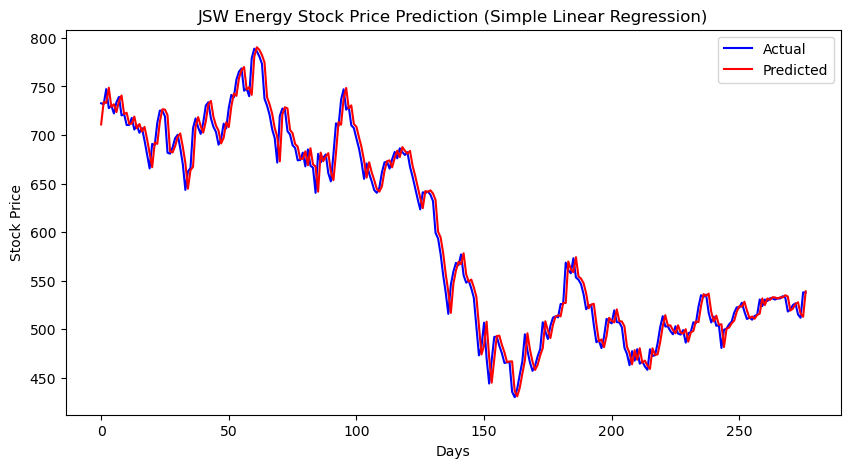

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.title('JSW Energy Stock Price Prediction (Simple Linear Regression)')
plt.show()

In [45]:
import pandas as pd
import sqlite3

# Load data from SQLite
conn = sqlite3.connect("jswe_stock_data.db")
df = pd.read_sql("SELECT Date, Close FROM stock_prices", conn)
conn.close()

# Prepare time series
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('B')  # Business day frequency
df['Close'].interpolate(method='linear', inplace=True)  # Fill missing data

C:\Users\Aditya Sakpal\AppData\Local\Temp\ipykernel_36628\4033932747.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(method='linear', inplace=True)  # Fill missing data


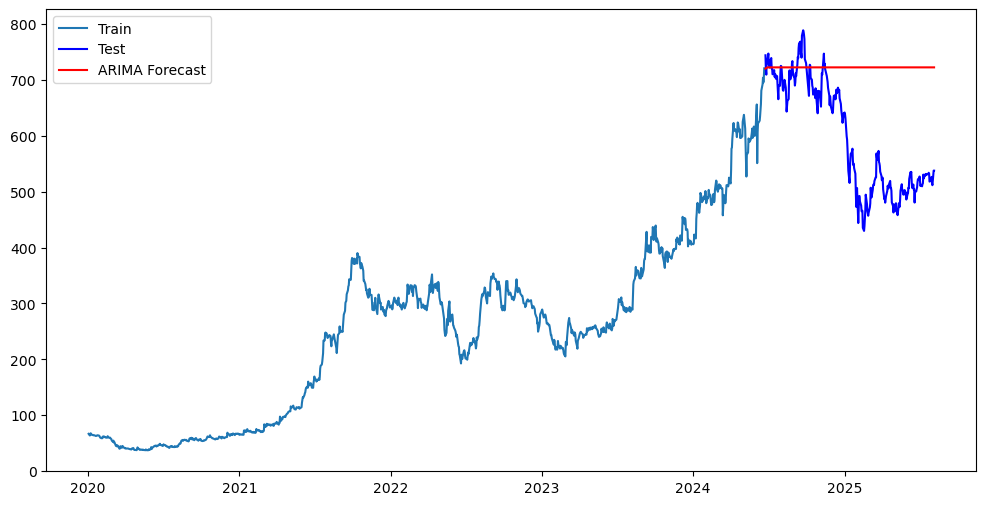

In [52]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Split into train and test
train_size = int(len(df) * 0.8)
train, test = df['Close'][0:train_size], df['Close'][train_size:]

# Fit ARIMA
model = ARIMA(train, order=(5,1,0))  # (p,d,q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.show()


In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np

arima_rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"ARIMA RMSE: {arima_rmse:.2f}")

ARIMA RMSE: 159.26


In [55]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [56]:
from pmdarima import auto_arima

# Auto-select ARIMA parameters
stepwise_model = auto_arima(df['Close'], start_p=1, start_q=1,
                            max_p=5, max_q=5, m=1,
                            start_P=0, seasonal=False,
                            d=None, trace=True,
                            error_action='ignore',
                            suppress_warnings=True, stepwise=True)

print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10839.314, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10836.012, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10837.362, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10837.352, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10835.548, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.184 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1458
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5416.774
Date:                Wed, 06 Aug 2025   AIC                          10835.548
Time:                        02:59:17   BIC                          10840.832
Sample:                    01-03-2020   HQIC                         10837.519
                         - 08-05-2025                                  

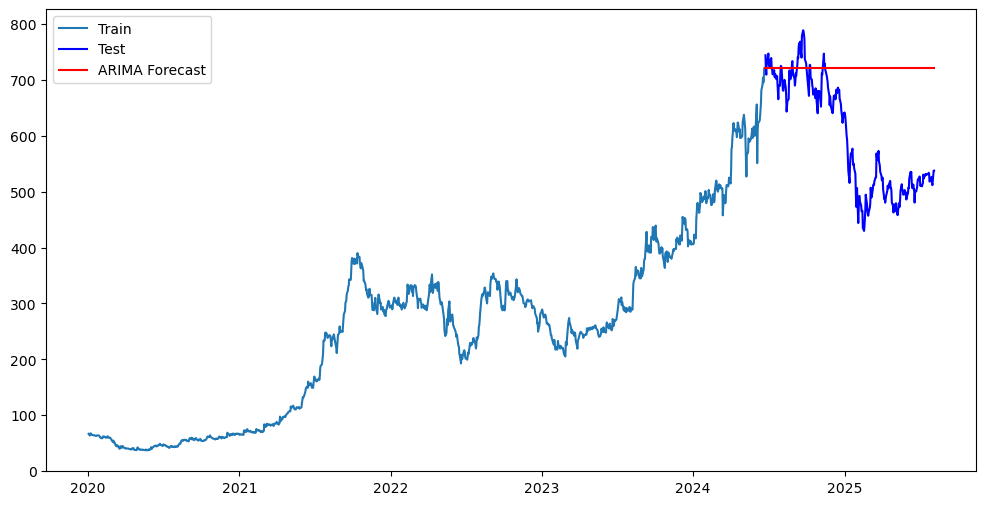

In [57]:
# Split into train/test (80/20)
train_size = int(len(df) * 0.8)
train, test = df['Close'][0:train_size], df['Close'][train_size:]

# Fit ARIMA using best params
model = ARIMA(train, order=stepwise_model.order)
model_fit = model.fit()

# Forecast for test set
forecast_test = model_fit.forecast(steps=len(test))

# Forecast for next 30 days
future_forecast = model_fit.forecast(steps=30)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(test.index, forecast_test, label='ARIMA Forecast', color='red')
plt.legend()
plt.show()


In [58]:
future_forecast_df = pd.DataFrame({'Date': pd.date_range(start=df.index[-1], periods=30, freq='B'),
                                   'Forecasted Price': future_forecast})
future_forecast_df.to_excel('JSW_Energy_ARIMA_Forecast.xlsx', index=False)

print("Forecast exported to 'JSW_Energy_ARIMA_Forecast.xlsx'")

Forecast exported to 'JSW_Energy_ARIMA_Forecast.xlsx'


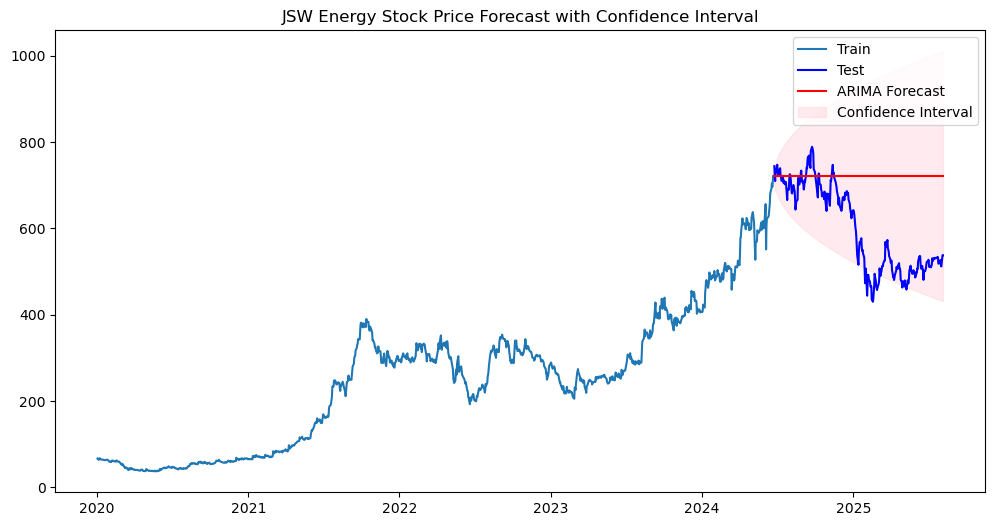

In [59]:
# Forecast with confidence intervals for test set
forecast_result = model_fit.get_forecast(steps=len(test))
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Plot test forecast with confidence intervals
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(test.index, forecast_mean, label='ARIMA Forecast', color='red')
plt.fill_between(test.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.title('JSW Energy Stock Price Forecast with Confidence Interval')
plt.show()


In [8]:
import sqlite3
import pandas as pd

# connect to your existing SQLite database
conn = sqlite3.connect("jswe_stock_data.db")  # change filename if needed

# load the table with price data
df = pd.read_sql("SELECT Date, Close FROM stock_prices", conn)

# ensure Date is datetime and sorted
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# now split into train/test
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

# fit ARIMA
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(0,1,0))
model_fit = model.fit()

# forecast
forecast = model_fit.forecast(steps=len(test))


In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error
def mape(y_true,y_pred): return np.mean(np.abs((y_true-y_pred)/y_true))*100
print("RMSE:", np.sqrt(mean_squared_error(test,forecast)))
print("Normalized RMSE (% of mean price):", np.sqrt(mean_squared_error(test,forecast))/np.mean(train)*100)
print("MAPE (%):", mape(test, forecast))

RMSE: 150.1540170357333
Normalized RMSE (% of mean price): 60.72429491683165
MAPE (%): 23.25150096779752


In [11]:
!pip install arch



   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   - ------------------------------------- 30.7/926.2 kB 660.6 kB/s eta 0:00:02
   -------- ------------------------------- 204.8/926.2 kB 2.5 MB/s eta 0:00:01
   ---------------------- ----------------- 532.5/926.2 kB 4.2 MB/s eta 0:00:01
   -------------------------------------- - 890.9/926.2 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 926.2/926.2 kB 4.5 MB/s eta 0:00:00


In [12]:
from arch import arch_model

# Use ARIMA residuals
residuals = model_fit.resid

# GARCH(1,1) model on residuals
garch = arch_model(residuals, vol='Garch', p=1, q=1)
garch_res = garch.fit(disp='off')

print(garch_res.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3600.21
Distribution:                  Normal   AIC:                           7208.43
Method:            Maximum Likelihood   BIC:                           7228.47
                                        No. Observations:                 1108
Date:                Sun, Aug 10 2025   Df Residuals:                     1107
Time:                        21:20:08   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3154      0.110      2.857  4.272e-03 [9.905e-0

In [13]:
# Forecast 10 steps ahead
garch_forecast = garch_res.forecast(horizon=10)

# Conditional volatility forecast
vol_forecast = garch_forecast.variance.values[-1] ** 0.5
print("Volatility Forecast:", vol_forecast)


Volatility Forecast: [23.8439933  23.84700043 23.85000719 23.85301357 23.85601957 23.8590252
 23.86203044 23.86503531 23.86803979 23.8710439 ]


In [14]:
# Your ARIMA forecast
price_forecast = model_fit.forecast(steps=len(test))

# Your GARCH volatility forecast
volatility_forecast = garch_res.forecast(horizon=len(test)).variance.values[-1] ** 0.5

# Create a DataFrame to display together
forecast_df = pd.DataFrame({
    'Predicted Price': price_forecast,
    'Predicted Volatility': volatility_forecast
})

print(forecast_df.head())

      Predicted Price  Predicted Volatility
1108       709.496216             23.843993
1109       709.496216             23.847000
1110       709.496216             23.850007
1111       709.496216             23.853014
1112       709.496216             23.856020


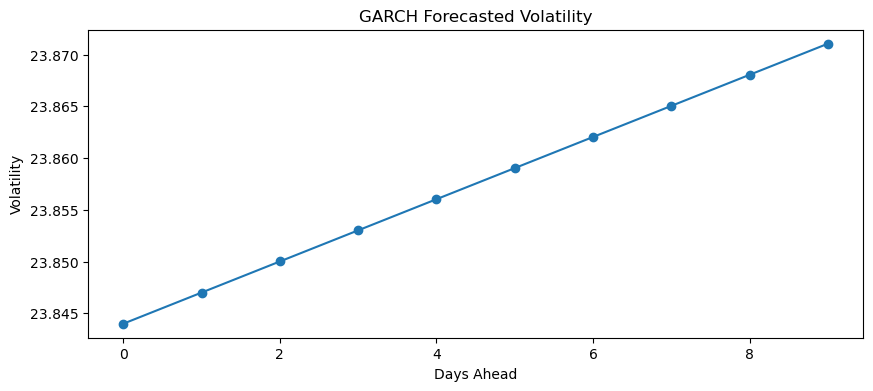

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(vol_forecast, marker='o')
plt.title('GARCH Forecasted Volatility')
plt.ylabel('Volatility')
plt.xlabel('Days Ahead')
plt.show()

📊 Model Performance:
RMSE: 150.1540170357333
MAE: 120.41975716821554
R² Score: -1.2253935423255662
Normalized RMSE (%): 60.72429491683165
MAPE (%): 23.25150096779752


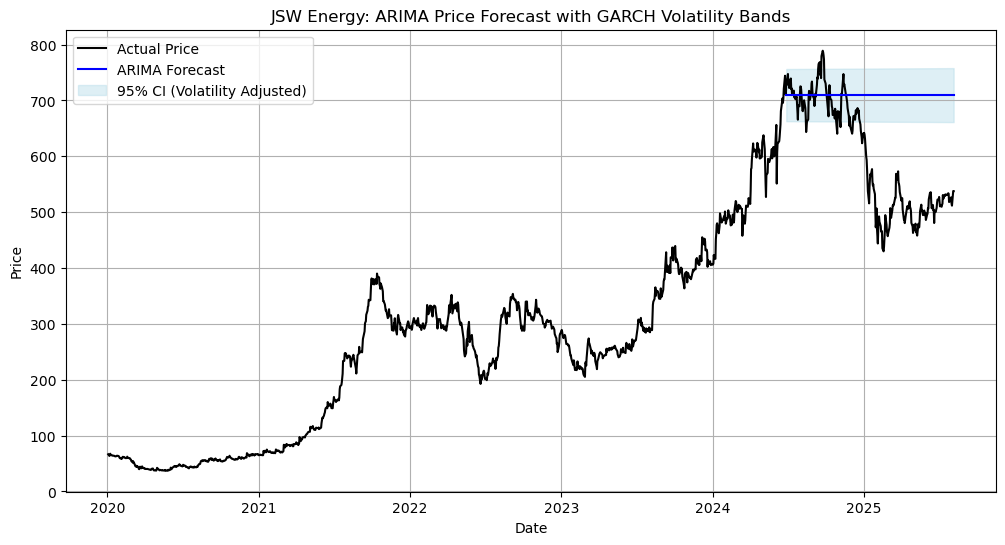

In [16]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from arch import arch_model

# 1️⃣ Load Data from SQLite
conn = sqlite3.connect("jswe_stock_data.db")
df = pd.read_sql("SELECT Date, Close FROM stock_prices", conn)
conn.close()

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# 2️⃣ Train/Test Split
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

# 3️⃣ Fit ARIMA model
model = ARIMA(train, order=(0,1,0))
model_fit = model.fit()

# 4️⃣ Price Forecast (ARIMA)
forecast = model_fit.forecast(steps=len(test))

# 5️⃣ Fit GARCH(1,1) on ARIMA residuals
residuals = model_fit.resid
garch = arch_model(residuals, vol='Garch', p=1, q=1)
garch_res = garch.fit(disp='off')

# 6️⃣ Volatility Forecast (GARCH)
vol_forecast = garch_res.forecast(horizon=len(test)).variance.values[-1] ** 0.5

# 7️⃣ Combine into a DataFrame
results_df = pd.DataFrame({
    'Date': df['Date'][train_size:].values,
    'Actual Price': test.values,
    'Predicted Price': forecast.values,
    'Predicted Volatility': vol_forecast
})

# 8️⃣ Evaluation Metrics
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("📊 Model Performance:")
print("RMSE:", np.sqrt(mean_squared_error(test, forecast)))
print("MAE:", mean_absolute_error(test, forecast))
print("R² Score:", r2_score(test, forecast))
print("Normalized RMSE (%):", np.sqrt(mean_squared_error(test, forecast)) / np.mean(train) * 100)
print("MAPE (%):", mape(test, forecast))

# 9️⃣ Plot Price Forecast + Volatility
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Actual Price', color='black')
plt.plot(results_df['Date'], results_df['Predicted Price'], label='ARIMA Forecast', color='blue')

# Add volatility bands (±1.96 * volatility)
upper_band = results_df['Predicted Price'] + 1.96 * results_df['Predicted Volatility']
lower_band = results_df['Predicted Price'] - 1.96 * results_df['Predicted Volatility']
plt.fill_between(results_df['Date'], lower_band, upper_band, color='lightblue', alpha=0.4, label='95% CI (Volatility Adjusted)')

plt.title('JSW Energy: ARIMA Price Forecast with GARCH Volatility Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
